In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from viz import viz
from bokeh.plotting import figure, show, output_notebook, output_file, save
from functions import merge_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# load data
ahrf_data = 'data/hrsa/data_AHRF_2018-2019/processed/df_renamed.pkl'
usafacts_data_cases = 'data/usafacts/confirmed_cases_mar22.csv'
diabetes = 'data/diabetes/DiabetesAtlasCountyData.csv'
voting = 'data/voting/county_voting_processed.pkl'
df = merge_data.merge_data(ahrf_data=ahrf_data, 
                           usafacts_data_cases=usafacts_data_cases,
                           medicare_group="All Beneficiaries",
                           voting=voting,
                           diabetes=diabetes) # also cleans usafacts data

/accounts/projects/vision/chandan/covid-19-geographic-risk-prediction/functions/merge_data.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  diabetes = pd.read_csv(diabetes, skiprows = 2, skipfooter = 1)


In [8]:
outcome = '#Cases_3/21/2020'
df = df.sort_values(outcome, ascending=False)
df = df.infer_objects()
print(df.keys())

# add features
df['FracMale2017'] = df['PopTotalMale2017'] / (df['PopTotalMale2017'] + df['PopTotalFemale2017'])

Index(['id', 'Header-FIPSStandCtyCode', 'EntityofFile',
       'SecondaryEntityOfFile', 'DateofFile', 'DateofCreation', 'FileLength',
       'StateName', 'StateNameAbbreviation', 'CountyName',
       ...
       'condition_Heart Failure', 'condition_Hepatitis',
       'condition_Hyperlipidemia', 'condition_Hypertension',
       'condition_Ischemic Heart Disease', 'condition_Osteoporosis',
       'condition_Psychotic Disorders', 'condition_Stroke',
       'Diabetes Percentage', 'dem_to_rep_ratio'],
      dtype='object', length=7234)


In [11]:
df[[outcome, 'StateName', 'CountyName', ]].head(10)

,#Cases_3/21/2020,StateName,CountyName
1862,8115.0,New York,New York
1891,1385.0,New York,Westchester
1861,1234.0,New York,Nassau
2975,934.0,Washington,King
1883,662.0,New York,Suffolk
614,548.0,Illinois,Cook
2989,447.0,Washington,Snohomish
1152,418.0,Louisiana,Orleans
1779,363.0,New Jersey,Bergen
208,351.0,California,Los Angeles


In [13]:
demographics = ['PopulationEstimate2018', 'Population(Persons)2017',  
                'PopTotalMale2017', 'PopTotalFemale2017', 'FracMale2017',
                'PopulationEstimate65+2017',
                'PopulationDensityperSqMile2010',
                'MedianAge2010', 'MedianAge,Male2010', 'MedianAge,Female2010',
               ]

# income vars

# hospital vars
hospitals = ['#FTETotalHospitalPersonnelShortTermGeneralHospitals2017',  "TotalM.D.'s,TotNon-FedandFed2017"]

# comorbidity vars
comorbidity = [ '#EligibleforMedicare2018',  'MedicareEnrollment,AgedTot2017', 
               '3-YrDiabetes2015-17']

political = ['dem_to_rep_ratio']

important_vars = demographics + comorbidity + hospitals + political

# correlations

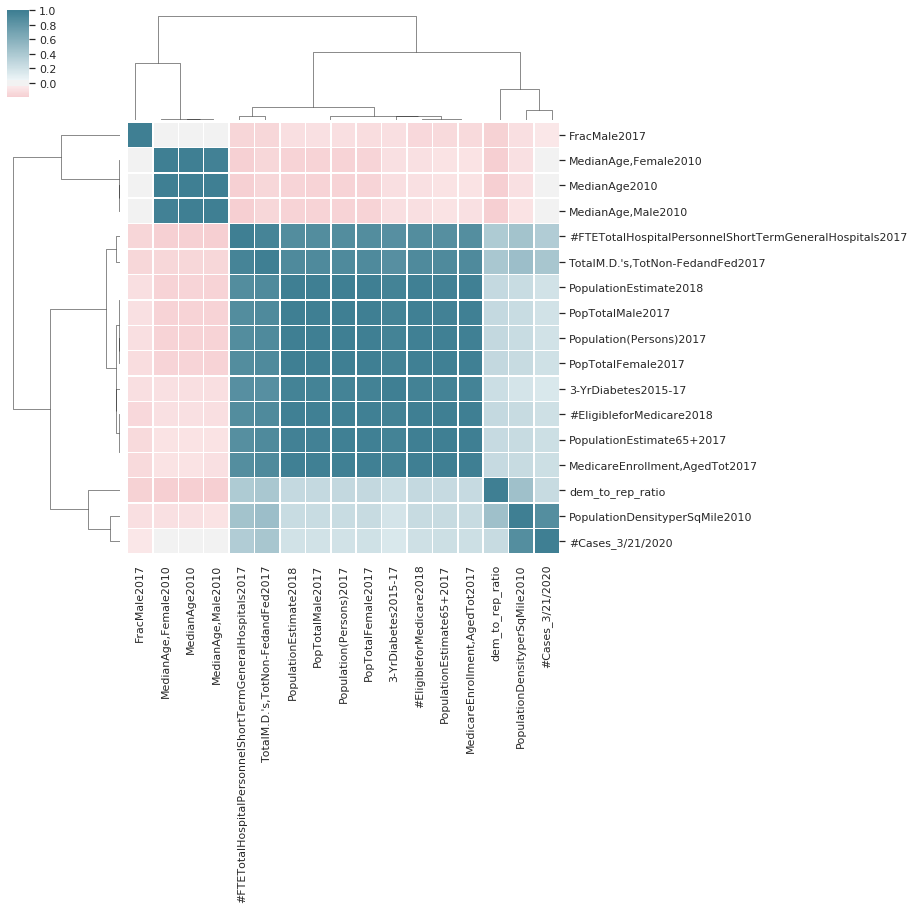

In [14]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = df[important_vars + [outcome]]

# Compute the correlation matrix
corr = d.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.clustermap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# interactive plots

In [ ]:
# filter by state
for state in ['NY', 'WA', 'CA']:
    d = df[df["StateNameAbbreviation"] == state]

    p = viz.plot_counties(d, 
                          variable_to_distribute=outcome,
                          variables_to_display=important_vars,
                          state=state,
                          logcolor=False)
    
    output_file(f"results/{state}.html", mode='inline')
    show(p)
    save(p)

In [ ]:
[k for k in df.keys() if 'hosp' in k.lower()]

In [ ]:
list(df.keys())

## plot political leaning

In [ ]:
# filter by state
for state in ['NY', 'WA', 'CA']:
    d = df[df["StateNameAbbreviation"] == state]

    p = viz.plot_counties(d, 
                          variable_to_distribute='dem_to_rep_ratio',
                          variables_to_display=important_vars,
                          state=state,
                          logcolor=False)
    show(p)